In [1]:
!pip install transformers[torch]

In [10]:
!cp '/content/drive/MyDrive/persian_text_summary.zip' '/content'

In [11]:
!unzip '/content/persian_text_summary.zip'

Archive:  /content/persian_text_summary.zip
  inflating: persian_text_summary.csv  


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/persian_text_summary.csv').reset_index()

In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df.head()

,index,article,summary
0,0,به گزارش شانا، علی کاردر امروز (۲۷ دی ماه) در ...,مدیرعامل شرکت ملی نفت، عملکرد مدیریت امور بین‎...
1,1,به گزارش شانا به نقل از شرکت ملی صنایع پتروشیم...,سرپرست مدیریت برنامه‌ریزی و توسعه شرکت ملی صنا...
2,2,به گزارش شانا به نقل از شرکت پالایش گاز شهید ه...,پالایشگاه گاز خانگیران با هدف معرفی گوگرد بنتو...
3,3,به گزارش خبرنگار ایمنا، سعید نظری در صفحه اینس...,سخنگوی شورای شهر شیراز گفت: روند عمرانی و شهرس...
4,4,به گزارش شانا، سیدباقر مرتضوی، مشاور وزیر نفت ...,مشاور وزیر نفت و مدیرکل اچ اس یی و پدافند غیرع...


In [16]:
!pip install -qU transformers
!pip install -qU hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.5/367.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 25.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [7]:
df["article_summary"] = df["article"] + "<|startoftext|>" + df["summary"].apply(lambda t: t.replace("    ", "").replace("\t", ""))
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,index,article,summary,article_summary
0,0,به گزارش شانا، علی کاردر امروز (۲۷ دی ماه) در ...,مدیرعامل شرکت ملی نفت، عملکرد مدیریت امور بین‎...,به گزارش شانا، علی کاردر امروز (۲۷ دی ماه) در ...
1,1,به گزارش شانا به نقل از شرکت ملی صنایع پتروشیم...,سرپرست مدیریت برنامه‌ریزی و توسعه شرکت ملی صنا...,به گزارش شانا به نقل از شرکت ملی صنایع پتروشیم...
2,2,به گزارش شانا به نقل از شرکت پالایش گاز شهید ه...,پالایشگاه گاز خانگیران با هدف معرفی گوگرد بنتو...,به گزارش شانا به نقل از شرکت پالایش گاز شهید ه...
3,3,به گزارش خبرنگار ایمنا، سعید نظری در صفحه اینس...,سخنگوی شورای شهر شیراز گفت: روند عمرانی و شهرس...,به گزارش خبرنگار ایمنا، سعید نظری در صفحه اینس...
4,4,به گزارش شانا، سیدباقر مرتضوی، مشاور وزیر نفت ...,مشاور وزیر نفت و مدیرکل اچ اس یی و پدافند غیرع...,به گزارش شانا، سیدباقر مرتضوی، مشاور وزیر نفت ...


In [27]:
article = list(df["article"].unique())[:5000]

In [9]:
import numpy as np

In [10]:
idx = np.random.randint(0, len(df))
print(idx)
print(df.iloc[idx]["article"])
print(df.iloc[idx]["summary"])
print(df.iloc[idx]["article_summary"])

121958
روند ولادت‌های ثبت شده در چند سال اخیر حاکی از کاهش فرزندآوری در ایران است.
همجنین از متولدان سال گذشته ۵۷۵ هزار و ۱۶۹ نفر پسر و ۵۳۸ هزار و ۹۵۹ نفر دختر ثبت شده است.
روند ولادت‌های ثبت شده در چند سال اخیر حاکی از کاهش فرزندآوری در ایران است.<|startoftext|>همجنین از متولدان سال گذشته ۵۷۵ هزار و ۱۶۹ نفر پسر و ۵۳۸ هزار و ۹۵۹ نفر دختر ثبت شده است.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223800 entries, 0 to 223799
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   index            223800 non-null  int64 
 1   article          223800 non-null  object
 2   summary          223800 non-null  object
 3   article_summary  223800 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.8+ MB


In [11]:
from pathlib import Path

import torch
from transformers import AutoTokenizer, AutoConfig, AutoModelWithLMHead
from transformers import AutoTokenizer, GPT2LMHeadModel, GPT2Config

from IPython import display

In [12]:
model_name_or_path = "HooshvareLab/gpt2-fa"

In [13]:
tokenizer = AutoTokenizer.from_pretrained(
    model_name_or_path,
    bos_token='<s>',
    eos_token='</s>',
    pad_token='<pad>',
    unk_token='<unk>'
)
tokenizer.add_special_tokens({
    "bos_token": '</s>',
    "eos_token": '</s>',
    "pad_token": '<pad>',
    "unk_token": '<unk>'
})

0

In [14]:
config = AutoConfig.from_pretrained(
    model_name_or_path,
    bos_token_id=tokenizer("<s>")["input_ids"][0],
    eos_token_id=tokenizer("</s>")["input_ids"][0],
    pad_token_id=tokenizer("<pad>")["input_ids"][0],
    unk_token_id=tokenizer("<unk>")["input_ids"][0],
)

In [26]:
tokenizer.save_pretrained("/content/gpt2/")
config.save_pretrained("/content/gpt2/")

!wget "https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/pytorch_model.bin" -P /content/gpt2/
!wget "https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/tokenizer.json" -P /content/gpt2/

--2023-08-25 09:25:39--  https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/pytorch_model.bin
Resolving huggingface.co (huggingface.co)... 18.172.134.124, 18.172.134.4, 18.172.134.88, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/HooshvareLab/gpt2-fa/46b0b806c740a0f0a9f056f5574c5fa896166fe844945fd3c849bf34365e5060?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1693214739&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MzIxNDczOX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9Ib29zaHZhcmVMYWIvZ3B0Mi1mYS80NmIwYjgwNmM3NDBhMGYwYTlmMDU2ZjU1NzRjNWZhODk2MTY2ZmU4NDQ5NDVmZDNjODQ5YmYzNDM2NWU1MDYwP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&

In [15]:
tokenizer = AutoTokenizer.from_pretrained(
    "/content/gpt2",
    bos_token='<s>',
    eos_token='</s>',
    pad_token='<pad>'
)

print(tokenizer.encode("سلام بر شما"))
print(tokenizer.encode("<s>"))
print(tokenizer.encode("</s>"))
print(tokenizer.encode("<pad>"))
print(tokenizer.encode("<|startoftext|>"))
print(tokenizer.encode("<sep>"))

[8906, 327, 512]
[0]
[2]
[1]
[6]
[9]


In [16]:
texts = df["article_summary"].values.tolist()

print(len(texts))

223800


In [19]:
# max_seq = max([len(tokenizer.encode(text)) for text in texts])

# print(f'The longest text is {max_seq} tokens long.')

# Due to the limited resources and for the sake of simplicity
# Set to 256
max_seq = 256

In [17]:
from torch.utils.data import Dataset  # this is the pytorch class import
import torch
torch.manual_seed(42)


class SummaryGenDataset(Dataset):

    def __init__(self, txt_list, tokenizer, max_length=1024):

        self.tokenizer = tokenizer  # the gpt2 tokenizer we instantiated
        self.input_ids = []
        self.attn_masks = []

        for txt in txt_list:
            """
            This loop will iterate through each entry in the flavour text corpus.
            For each bit of text it will prepend it with the start of text token,
            then append the end of text token and pad to the maximum length with the
            pad token.
            """

            encodings_dict = tokenizer('<s>' + txt + '</s>',
                                       truncation=True,
                                       max_length=max_length,
                                       padding='max_length')

            """
            Each iteration then appends either the encoded tensor to a list,
            or the attention mask for that encoding to a list. The attention mask is
            a binary list of 1's or 0's which determine whether the langauge model
            should take that token into consideration or not.
            """
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [20]:
from torch.utils.data import random_split

dataset = SummaryGenDataset(texts[:5000], tokenizer, max_length=max_seq)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

f'There are {len(train_dataset)} samples for training, and {len(val_dataset)} samples for validation testing'

'There are 4500 samples for training, and 500 samples for validation testing'

In [21]:
print(train_dataset[0][0][:100])
print(tokenizer.decode(train_dataset[0][0][:100]))

tensor([    0,   490,   893,  4146,   303,  1893,   312,  3586,  1848,  3836,
         2796,  1363,   305,  2593,  3590,  4129,   305,  1371,   428,   799,
          285,  1622,   305,  3708,  4628,   656,    19,   298,  8779,   986,
         1177,  3663,   314,  1454,   326,   323,  1072,   314,   912,  1010,
          366,  1522,  1629,   564,  1346,   611,   395,   305,   639,    36,
          986,   312,  1072,   293,  1863, 12109,  3327,  2366,   305,  1794,
         1637,   712,   399,   326,   426,   668,   312,   358,   323,   986,
          303,  3359,   377,   303, 12436,   983,   501,   293,   314,  1213,
          293, 11950,   298,  2460,   516,  1185,   305,   314,  1575,   305,
        23872,   293,   298,  1207,   354,   509,  1931,   305,  1629,   564])
<s>به گزارش شانا به نقل از پایگاه اطلاع رسانی ریاست جمهوری، دکتر حسن روحانی، امروز (سه‌شنبه، ۲۱ اردیبهشت ماه) در اجتماع مردم استان کرمان با بیان این که دولت با تمام توان برای حل مشکلات کشور تلاش خواهد کرد، گفت: مردم از 

In [22]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=8
)

validation_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=8
)

In [23]:
import random
from transformers import GPT2LMHeadModel, GPT2Config
import numpy as np

# Loading the model configuration and setting it to the GPT2 standard settings.
configuration = GPT2Config.from_pretrained('./gpt2', output_hidden_states=False)

# Create the instance of the model and set the token size embedding length
model = GPT2LMHeadModel.from_pretrained("./gpt2", config=configuration)
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# This step is optional but will enable reproducible runs.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 42001. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [24]:
epochs = 3
warmup_steps = 1e2
sample_every = 300

In [25]:
from transformers import AdamW

# AdamW is a class from the huggingface library, it is the optimizer we will be using, and we will only be instantiating it with the default parameters.
optimizer = AdamW(
    model.parameters(),
    lr=5e-4,
    eps=1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [26]:
from transformers import get_linear_schedule_with_warmup

"""
Total training steps is the number of data points, times the number of epochs.
Essentially, epochs are training cycles, how many times each point will be seen by the model.
"""

total_steps = len(train_dataloader) * epochs

"""
We can set a variable learning rate which will help scan larger areas of the
problem space at higher LR earlier, then fine tune to find the exact model minima
at lower LR later in training.
"""
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps)

In [ ]:
# tokenizer(sample_input)["input_ids"]
# torch.tensor(tokenizer([sample_input])["input_ids"])

In [29]:
sample_article = article[np.random.randint(0, 1024)]
sample_input = f"<s>{sample_article}<|startoftext|>"
print(sample_input)
sample_input_ids = torch.tensor(tokenizer([sample_input])["input_ids"])
sample_input_ids = sample_input_ids.to(device)

sample_outputs = model.generate(
    input_ids=sample_input_ids,
    #bos_token_id=random.randint(1, len(tokenizer.get_vocab())),
    do_sample=True,
    top_k=50,
    max_length=len(sample_input_ids) + 10,
    top_p=0.95,
    num_return_sequences=1
)
for i, sample_output in enumerate(sample_outputs):
    gen_sample_output = tokenizer.decode(sample_output, skip_special_tokens=False)
    gen_sample_output = gen_sample_output.replace("<|startoftext|>", "\n")
    gen_sample_output = gen_sample_output.replace("<s>", "")
    gen_sample_output = gen_sample_output.replace("</s>", "")
    gen_sample_output = gen_sample_output.replace("<sep>", "\n")

    print(f'Example output: {gen_sample_output}')

<s>به گزارش شانا، متن پیام سیدباقر مرتضوی به شرح زیر است: [n] انا لله و انا الیه راجعون [n] با کمال تاسف؛ خبر درگذشت نابهنگام همکار عزیز، پرتلاش و متعهد اچ‌اس‌یی صنعت نفت جناب آقای مهندس محمدرضا کاظمی، رئیس اچ‌اس‌یی منطقه عملیاتی خارک شرکت پایانه‌های نفتی ایران، موجب تاثر و تالم عمیق گردید. [n] مسئولیت پذیری، سختکوشی و صداقت از صفات برجسته ایشان در طول دوران خدمت در صنعت نفت بود و بی‌شک آثار خدمات ارزنده ایشان در صنعت نفت ماندگار خواهد بود. [n] این جانب به نمایندگی از مجموعه اچ‌اس‌یی و پدافند غیرعامل صنعت نفت، این ضایعه تاسف‌بار را به خانواده معزز ایشان تسلیت عرض نموده و از خداوند متعال برای روح آن فقید سعید رحمت بیکران و برای بازماندگان صبر و بردباری مسئلت می‌نمایم.<|startoftext|>


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1262: UserWarning: Input length of input_ids is 177, but `max_length` is set to 11. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


Example output: به گزارش شانا، متن پیام سیدباقر مرتضوی به شرح زیر است: [n] انا لله و انا الیه راجعون [n] با کمال تاسف؛ خبر درگذشت نابهنگام همکار عزیز، پرتلاش و متعهد اچ‌اس‌یی صنعت نفت جناب آقای مهندس محمدرضا کاظمی، رئیس اچ‌اس‌یی منطقه عملیاتی خارک شرکت پایانه‌های نفتی ایران، موجب تاثر و تالم عمیق گردید. [n] مسئولیت پذیری، سختکوشی و صداقت از صفات برجسته ایشان در طول دوران خدمت در صنعت نفت بود و بی‌شک آثار خدمات ارزنده ایشان در صنعت نفت ماندگار خواهد بود. [n] این جانب به نمایندگی از مجموعه اچ‌اس‌یی و پدافند غیرعامل صنعت نفت، این ضایعه تاسف‌بار را به خانواده معزز ایشان تسلیت عرض نموده و از خداوند متعال برای روح آن فقید سعید رحمت بیکران و برای بازماندگان صبر و بردباری مسئلت می‌نمایم.
به


In [49]:
import random
import time
import datetime
from tqdm import tqdm


def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))


total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in tqdm(range(0, epochs), position=0):

    print(f'Beginning epoch {epoch_i + 1} of {epochs}')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader), position=0):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()

        outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks, token_type_ids=None)

        loss = outputs[0]

        batch_loss = loss.item()
        total_train_loss += batch_loss

        # Get sample every 100 batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print()
            print(f'Batch {step} of {len(train_dataloader)}. Loss:{batch_loss}. Time:{elapsed}')

            model.eval()

            sample_article = article[np.random.randint(0, len(article))]
            sample_input = f"<s>{sample_article}<|startoftext|>"
            sample_input_ids = torch.tensor(tokenizer([sample_input])["input_ids"])
            sample_input_ids = sample_input_ids.to(device)

            sample_outputs = model.generate(
                input_ids=sample_input_ids,
                # bos_token_id=random.randint(1, len(tokenizer.get_vocab())),
                do_sample=True,
                top_k=50,
                #max_length=50,
                max_length=len(sample_input_ids) + 10,  # Set `max_length` to length of input sequence + some additional tokens
                top_p=0.95,
                num_return_sequences=1
            )
            for i, sample_output in enumerate(sample_outputs):
                gen_sample_output = tokenizer.decode(sample_output, skip_special_tokens=False)
                gen_sample_output = gen_sample_output.replace("<|startoftext|>", "\n")
                gen_sample_output = gen_sample_output.replace("<s>", "")
                gen_sample_output = gen_sample_output.replace("</s>", "")
                gen_sample_output = gen_sample_output.replace("<sep>", "\n")

                print(f'Example output: {gen_sample_output}')

            model.train()

        loss.backward()
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print()
    print(f'Average Training Loss: {avg_train_loss}. Epoch time: {training_time}')
    print()

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in tqdm(validation_dataloader, total=len(validation_dataloader), position=0):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        with torch.no_grad():

            outputs = model(b_input_ids, attention_mask=b_masks, labels=b_labels)

            loss = outputs[0]

        batch_loss = loss.item()
        total_eval_loss += batch_loss

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    validation_time = format_time(time.time() - t0)

    print()
    print(f'Validation loss: {avg_val_loss}. Validation Time: {validation_time}')
    print()

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print(f'Total training took {format_time(time.time()-total_t0)}')

  0%|          | 0/3 [00:00<?, ?it/s]

Beginning epoch 1 of 3


 53%|█████▎    | 300/563 [02:46<02:29,  1.76it/s]


Batch 300 of 563. Loss:1.241730809211731. Time:0:02:47
Example output: مدیر پژوهش و فناوری شرکت ملی گاز ایران در گفتگو با خبرنگار شانا اظهار کرد: طرح تولید بخاری با رده انرژی B در حال انجام است و برای نهایی شدن آن باید اصلاحاتی در خط تولید شرکت تولید کننده این بخاری انجام شود. [n] سعید پاک سرشت افزود: همزمان با طراحی و اصلاح خط تولید، مخترع ایرانی این طرح نیز دانش فنی تولید بخاری را به شرکت سازنده ارائه میکند. [n] وی تصریح کرد: بر اساس برنامه ریزی‌های انجام شده، تا پایان سال جاری ۱۰۰ هزار دستگاه از این بخاری‌ها به بازار عرضه می‌شود. [n] به گفته وی، مدیر پژوهش و فناوری شرکت ملی گاز ایران بمنظور محقق شدن این طرح بصورت جدی مراحل تولید این بخاری را از نزدیک پیگیری می‌کند. [n] وی تاکید کرد: مراحل تولید این بخاری بر اساس برنامه در حال انجام است و پیشرفت مطلوبی دارد. [n] به گزارش شانا، در نوزدهمین نمایشگاه بین المللی نفت، گاز، پالایش و پتروشیمی قرارداد اعطای مجوز به تولید اختراع بخاری‌های گازسوز با رده انرژی B با طراحی مخترعان داخلی، امضا شد. [n] در مرحله نخست این طرح با بهره گیری از دانش فن

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1262: UserWarning: Input length of input_ids is 419, but `max_length` is set to 11. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
100%|██████████| 563/563 [05:14<00:00,  1.79it/s]



Average Training Loss: 1.2569132964945602. Epoch time: 0:05:15



 33%|███▎      | 1/3 [05:26<10:53, 326.99s/it]


Validation loss: 2.7039196850761535. Validation Time: 0:00:12

Beginning epoch 2 of 3


 53%|█████▎    | 300/563 [02:49<02:27,  1.78it/s]


Batch 300 of 563. Loss:1.3600119352340698. Time:0:02:49
Example output: به گزارش ایمنا، شهرام وارسته از جذب درآمد ۴۷ میلیارد تومانی این منطقه در شش ماه ابتدای سال جاری خبر داد و اظهار کرد: این میزان درآمد نسبت به همین بازه زمانی در سال گذشته حدودا ۱۹۰ درصد افزایش داشته است. [n] وی درآمد منطقهک شهرداری فردیس در شهریور ماه را حدودا ۹ میلیارد تومان اعلام کرد و عنوان کرد: میزان درآمد شهرداری‌ها با رایه خدمات هر چه بهتر به شهروندان ارتباط مستقیم دارد، مطمئنا مردم از همه خدمات ارایه شده توسط شهرداری آگاه نیستند؛ این در حالیست که همه هزینه‌های پرداختی به شهرداری واضح و روشن است و این موضوع وظیفه شهرداری‌ها را در شفاف‌سازی درآمد و ارایه خدمات دشوار ساخته است. [n] مدیر منطقهک شهرداری فردیس افزود: شهرداری‌ها با داشتن درآمدهای پایدار گام‌های موثری در پیش رفت و توسعه شهری پایدار برمی‌دارند، ایجاد درآمد پایدار در منطقهک شهرداری فردیس، یکی از مهم‌ترین اهداف ما از ابتدای کار تا امروز بوده است. [n] وارسته با اشاره به ارایه طرح‌های درآمدی منطقهک شهرداری فردیس، عنوان کرد: روند رو به رشد درآمد این منطقه

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1262: UserWarning: Input length of input_ids is 351, but `max_length` is set to 11. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
100%|██████████| 563/563 [05:17<00:00,  1.77it/s]



Average Training Loss: 1.256969622142785. Epoch time: 0:05:17



 67%|██████▋   | 2/3 [10:56<05:28, 328.46s/it]


Validation loss: 2.7039196850761535. Validation Time: 0:00:12

Beginning epoch 3 of 3


 53%|█████▎    | 300/563 [02:49<02:28,  1.77it/s]


Batch 300 of 563. Loss:1.383077621459961. Time:0:02:50
Example output: به گزارش خبرنگار شانا، نمایندگان در نشست علنی امروز (سه‌شنبه، ۲۱ اردیبهشت ماه) مجلس شورای اسلامی، در جریان بررسی طرح تقویت و توسعه نظام استاندارد با مواد ۵۶، ۵۷ و ۵۹ این طرح تصویب شد. [n] در ماده ۵۶ این طرح منابع مالی سازمان استاندارد مشخص شده که به شرح زیر است: [n] ۱. اعتباراتی که همه ساله به صورت کمک و نیز غیر آن طی ردیفهای مربوط در بودجه سالانه کشور منظور می‌شود. [n] ۲. هدایا و کمکهای اشخاص حقیقی و حقوقی از سوی اشخاص غیر ذینفع [n] ۳. درآمدهای حاصل از فروش باقی مانده نمونه‌های کالا [n] براساس ماده ۵۷ این طرح بودجه سازمان با پیشنهاد رئیس سازمان و تصویب شورای عالی استاندارد توسط سازمان مدیریت و برنامه ریزی کشور در لایحه بودجه سنواتی درج می‌شود. [n] نمایندگان همچنین در جریان بررسی ماده ۵۷ عبارت خزانه داری کل کشور مکلف است ۱۰۰ درصد اعتبار مصوب را به سازمان مذکور پرداخت کنند به دلیل مغایرت با برنامه حذف کردند و پس از آن اصل ماده ۵۷ تصویب شد. [n] براساس ماده ۵۹ این طرح سازمان استاندارد موظف است به منظور بهره گیری از دا

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1262: UserWarning: Input length of input_ids is 262, but `max_length` is set to 11. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
100%|██████████| 563/563 [05:17<00:00,  1.77it/s]



Average Training Loss: 1.257806018444827. Epoch time: 0:05:18



100%|██████████| 3/3 [16:26<00:00, 328.74s/it]


Validation loss: 2.7039196850761535. Validation Time: 0:00:12

Total training took 0:16:26


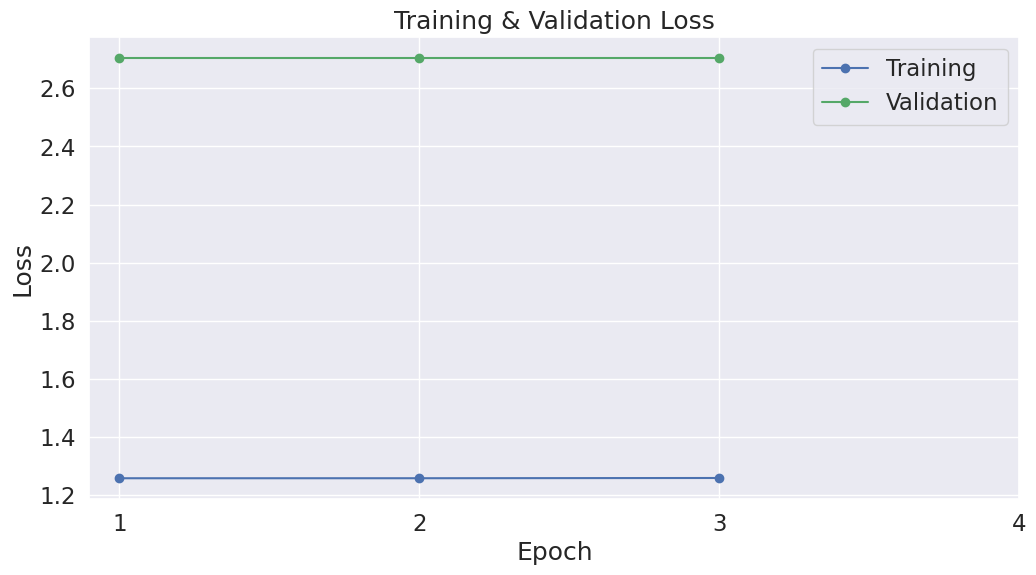

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [43]:
import os

output_dir = '/content/gpt2-fa-summary'
os.makedirs(output_dir, exist_ok=True)

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
configuration.save_pretrained(output_dir)
!cp /content/gpt2/tokenizer.json /content/gpt2-fa-summary/tf

In [35]:
from transformers import TFAutoModelForCausalLM,AutoModelForCausalLM

In [44]:
tf_model = TFAutoModelForCausalLM.from_pretrained("/content/gpt2-fa-summary/", from_pt=True)
print(tf_model.summary())
tf_model.save_pretrained("/content/gpt2-fa-summary/")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2LMHeadModel: ['lm_head.weight']
- This IS expected if you are initializing TFGPT2LMHeadModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2LMHeadModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


Model: "tfgpt2lm_head_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLaye  multiple                 118099200 
 r)                                                              
                                                                 
Total params: 118,099,200
Trainable params: 118,099,200
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='./gpt2-fa-summary')
set_seed(42)
genrated_summary=generator(" با وجود گذشت دو سال از دولت سیزدهم و با وجود وعده‌های انتخاباتی ابراهیم رییسی درباره تورم تک‌رقمی، اما آمارها از افزایش نرخ تورم به حدود ۴۷.۵ درصد حکایت دارد. این در شرایطی است که مقامات دولتی بدون استناد به آمارهای رسمی دولتی، از کاهش نرخ تورم در اقتصاد ایران سخن می‌گویند. سید احسان خاندوزی، وزیر اقتصاد در تازه‌ترین اظهارنظر عنوان کرده که در برخی شاخص‌ها از جمله کنترل نقدینگی که برای تورم ضروری است، بانک مرکزی از هدف جلوتر است."
            ,max_length=512, num_return_sequences=1)
response={}
for dictionary in genrated_summary:
  for key, value in dictionary.items():
      if key == 'generated_text':
          response['خلاصه تولیدی'] = value
      else:
          response[key] = value
response

{'خلاصه تولیدی': ' با وجود گذشت دو سال از دولت سیزدهم و با وجود وعده\u200cهای انتخاباتی ابراهیم رییسی درباره تورم تک\u200cرقمی، اما آمارها از افزایش نرخ تورم به حدود ۴۷.۵ درصد حکایت دارد. این در شرایطی است که مقامات دولتی بدون استناد به آمارهای رسمی دولتی، از کاهش نرخ تورم در اقتصاد ایران سخن می\u200cگویند. سید احسان خاندوزی، وزیر اقتصاد در تازه\u200cترین اظهارنظر عنوان کرده که در برخی شاخص\u200cها از جمله کنترل نقدینگی که برای تورم ضروری است، بانک مرکزی از هدف جلوتر است. [n] به گفته این مقام مسئول، با توجه به اینکه در کشور از زمان شیوع ویروس کرونا، تورم در حدود ۳۶ درصد افزایش داشته است، اما کاهش نرخ تورم در بسیاری از شاخص\u200cهای اقتصادی، همچنان از اهمیت بالایی برخوردار است. [n] این عضو کابینه دولت می\u200cگوید: در دولت دوازدهم، سیاست\u200cهای مالی در اولویت نبوده اما با این حال، دولت سیاست\u200cهای کنترلی را در نظر گرفته است.وزیر اقتصاد گفت: سیاست\u200cهای اقتصاد مقاومتی در حال اجرا است.'}

In [51]:
!zip -r gpt2-fa-summary.zip 'gpt2-fa-summary'

updating: gpt2-fa-summary/ (stored 0%)
updating: gpt2-fa-summary/config.json (deflated 52%)
updating: gpt2-fa-summary/generation_config.json (deflated 29%)
updating: gpt2-fa-summary/tokenizer_config.json (deflated 39%)
updating: gpt2-fa-summary/pytorch_model.bin (deflated 7%)
updating: gpt2-fa-summary/merges.txt (deflated 74%)
updating: gpt2-fa-summary/vocab.json (deflated 73%)
updating: gpt2-fa-summary/tf (deflated 79%)
updating: gpt2-fa-summary/added_tokens.json (stored 0%)
updating: gpt2-fa-summary/tf_model.h5 (deflated 7%)
updating: gpt2-fa-summary/tokenizer.json (deflated 79%)
updating: gpt2-fa-summary/special_tokens_map.json (deflated 45%)


In [ ]:
!mv '/persian_text_summary.zip' '/drive/MyDrive'